# K Means Color Image Quantization

In digital image processing, color image quantization is the process of reducing the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [19]:
image_as_array = mpimg.imread('flowers.jpg')

In [20]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[224,   2, 173],
        [226,   4, 175],
        [228,   7, 175],
        ...,
        [  3,   3, 133],
        [  3,   3, 133],
        [  3,   3, 133]],

       [[224,   2, 173],
        [226,   4, 175],
        [227,   5, 176],
        ...,
        [  2,   3, 130],
        [  2,   2, 132],
        [  2,   3, 130]],

       [[225,   3, 176],
        [226,   4, 175],
        [227,   5, 176],
        ...,
        [  0,   3, 128],
        [  1,   2, 129],
        [  1,   2, 128]],

       ...,

       [[240, 106,  11],
        [240, 106,  11],
        [238, 104,   9],
        ...,
        [ 95,   4,  97],
        [ 91,   5,  94],
        [ 90,   6,  94]],

       [[245, 107,  16],
        [244, 106,  15],
        [242, 104,  13],
        ...,
        [ 96,   7,  99],
        [ 91,   7,  95],
        [ 91,   8,  96]],

       [[245, 107,  16],
        [244, 106,  15],
        [243, 105,  14],
        ...,
        [ 94,   8,  99],
        [ 91,   7,  95],
        [ 92,   9,  97]]

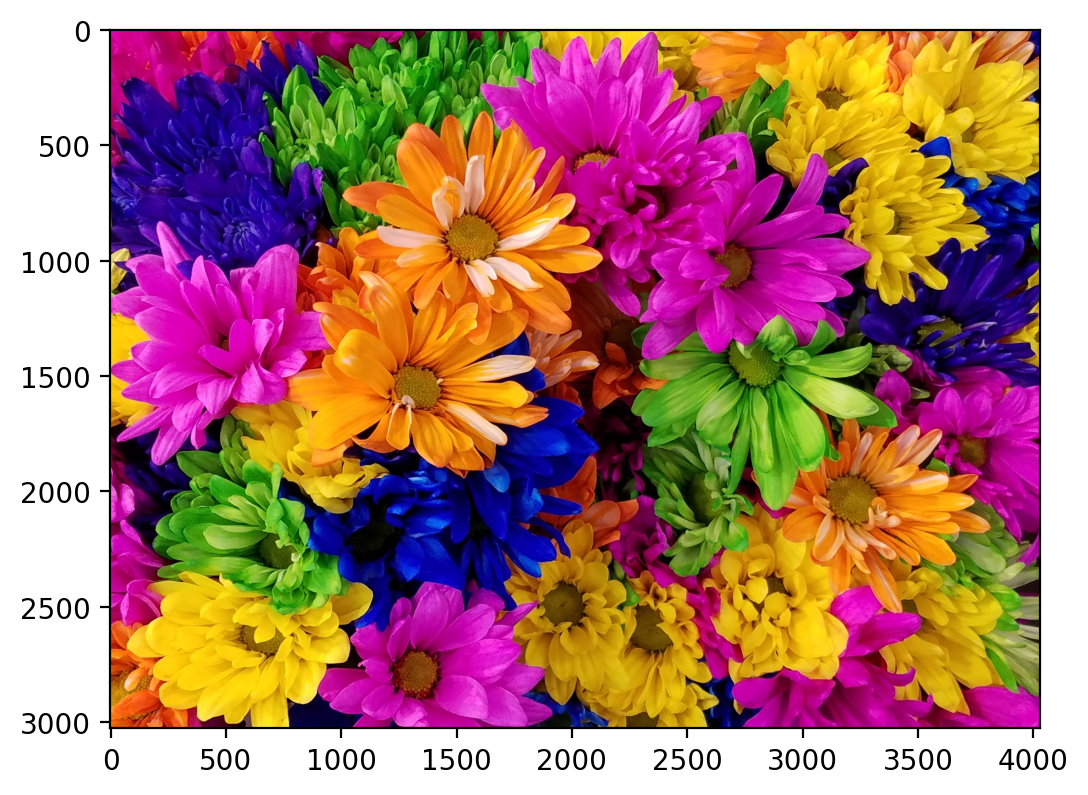

In [21]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [22]:
image_as_array.shape
# (h,w,3 color channels)

(3024, 4032, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [23]:
(h,w,c) = image_as_array.shape

In [24]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [25]:
from sklearn.cluster import KMeans

In [37]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(image_as_array2d)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append([k,model.inertia_])
ssd = pd.DataFrame(ssd, columns = ["Cluster","SSW"])

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

NameError: name 'pd' is not defined

In [ ]:
import plotly.express as px
fig = px.line(ssd, x="Cluster", y="SSW")
fig.update_layout(title = "Elbow Method", height = 500)
fig.update_layout(xaxis_title = "Cluster",yaxis_title = "SSW")
fig.show()

In [26]:
model = KMeans(n_clusters=6)

In [27]:
model

KMeans(n_clusters=6)

In [28]:
labels = model.fit_predict(image_as_array2d)

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
labels

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

In [30]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[ 56.07848528,  20.27312601,  22.88169817],
       [232.32577485, 180.21143104,  37.92106869],
       [198.0917361 ,  19.77826856, 159.35778823],
       [194.95920252, 106.01175358,  14.89209525],
       [ 27.35975116,   8.93534964, 130.03216058],
       [ 86.81743027, 145.6494765 ,  31.13531433]])

In [31]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [32]:
rgb_codes

array([[ 56,  20,  23],
       [232, 180,  38],
       [198,  20, 159],
       [195, 106,  15],
       [ 27,   9, 130],
       [ 87, 146,  31]])

In [33]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [34]:
quantized_image

array([[[198,  20, 159],
        [198,  20, 159],
        [198,  20, 159],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]],

       [[198,  20, 159],
        [198,  20, 159],
        [198,  20, 159],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]],

       [[198,  20, 159],
        [198,  20, 159],
        [198,  20, 159],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]],

       ...,

       [[195, 106,  15],
        [195, 106,  15],
        [195, 106,  15],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]],

       [[195, 106,  15],
        [195, 106,  15],
        [195, 106,  15],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]],

       [[195, 106,  15],
        [195, 106,  15],
        [195, 106,  15],
        ...,
        [ 27,   9, 130],
        [ 27,   9, 130],
        [ 27,   9, 130]]

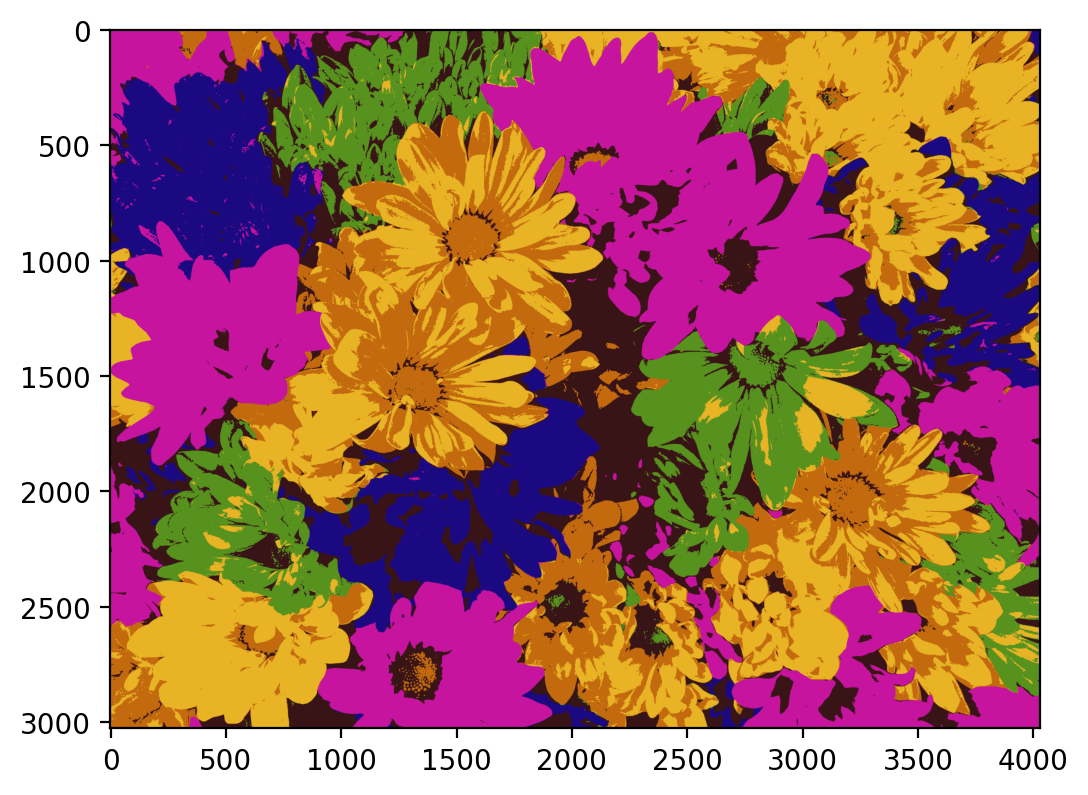

In [35]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)